In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import yaml
from pathlib import Path
import numpy as np

In [21]:
# read in yaml file (containing user inputs)
yml_path = f"{os.path.dirname(__file__)}/user_inputs.yml"
with open(yml_path) as f:
    inputs = yaml.safe_load(f)

# paths
generic_pictures_path = Path.home() / "Pictures"
today = datetime.date.today().strftime("%Y_%m_%d")
output_path = f"{generic_pictures_path}\{inputs['subreddit_name']}"

# import data
df = pd.read_csv(f'{output_path}\{inputs["subreddit_name"]}.csv')
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [45]:
# configuration

print(f"Subreddit name: {inputs['subreddit_name']}")
print(f"Time filter: {inputs['time_filter']}")
print(f"Post limit: {inputs['post_limit']}")


Subreddit name: anime
Time filter: month
Post limit: 50


In [61]:
# data manipulation

# create date columns
df['hour'] = df['datetime_utc'].dt.hour
df['day'] = df['datetime_utc'].dt.day
df['date'] = pd.to_datetime(df['datetime_utc']).dt.date
df['year_month'] = df['datetime_utc'].to_numpy().astype('datetime64[M]')


In [65]:
# summary stats

df.head()

,title,score,total_comments,post_url,datetime_utc,hour,day,date,month,year_month
0,"""Mushoku Tensei"" Thank You Illustration by Dir...",17547,587,https://i.redd.it/1h0riorejo681.jpg,2021-12-20 22:04:56,22,20,2021-12-20,2021-12-01,2021-12-01
1,"""Kaguya-sama: Love Is War"" Special Christmas V...",17364,189,https://i.redd.it/0picfnim4b781.jpg,2021-12-24 02:03:25,2,24,2021-12-24,2021-12-01,2021-12-01
2,Shingeki no Kyojin: The Final Season Part 2 - ...,16436,2635,https://www.reddit.com/r/anime/comments/s023oa...,2022-01-10 08:29:48,8,10,2022-01-10,2022-01-01,2022-01-01
3,I made a interactive map of anime based on MAL...,15572,432,https://i.redd.it/ktc5nrkq6kb81.gif,2022-01-14 12:55:55,12,14,2022-01-14,2022-01-01,2022-01-01
4,Cup Noodles Armageddon Commercial,14181,303,https://v.redd.it/1nzus5qqg3781,2021-12-23 00:17:29,0,23,2021-12-23,2021-12-01,2021-12-01


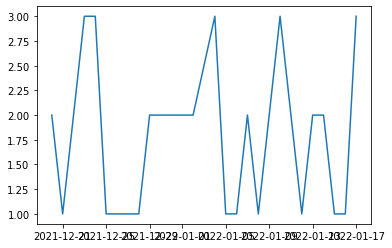

In [88]:
# frequency of posts over time

df_date = df.groupby(['date'], as_index=False).agg(
        count = ('score', 'count'),
        mean_score = ('score', 'mean'),
        mean_total_comments = ('total_comments', 'sum')
)

fig, ax = plt.subplots()
ax.plot(df_date['date'], df_date['count'], label='count')

In [ ]:
# distribution of score

In [ ]:
# scatterplot of score to comment